<a href="https://colab.research.google.com/github/Vrinda1sharma/Insurance-fraud-detection-/blob/main/Project_Insurance_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
df = pd.read_excel('/content/Vehicle_Insurance.xlsx')

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_day,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,460,62,183430,2002-06-25,IN,250/500,1000,1187.96,4000000,618845,MALE,JD,other-service,bungie-jumping,own-child,0,0,2015-01-01,Thu,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,5380 Pine St,20,3,NO,1,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
1,116,34,616337,2012-08-30,IN,250/500,500,1737.66,0,470577,MALE,Associate,transport-moving,chess,unmarried,0,-24100,2015-01-01,Thu,Single Vehicle Collision,Side Collision,Major Damage,Police,WV,Northbrook,5719 2nd Lane,1,1,?,1,1,?,97080,16180,16180,64720,BMW,X5,2001,Y
2,192,35,582011,1997-03-10,IL,100/300,1000,1245.89,0,435481,FEMALE,Masters,exec-managerial,movies,wife,0,-40300,2015-01-01,Thu,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Springfield,6011 Britain St,19,1,NO,0,0,?,76600,15320,7660,53620,Mercedes,C300,2000,N
3,295,49,872814,1992-06-13,IL,100/300,500,1141.62,0,451672,MALE,College,prof-specialty,kayaking,husband,34300,-24300,2015-01-01,Thu,Vehicle Theft,?,Minor Damage,None,WV,Columbus,8085 Andromedia St,4,1,YES,1,3,YES,4320,480,480,3360,Mercedes,E400,2002,N
4,200,40,932502,2010-05-11,IL,100/300,1000,1439.34,0,444822,FEMALE,High School,sales,exercise,other-relative,45300,-20400,2015-01-01,Thu,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,2577 Washington Drive,9,1,?,0,0,NO,3690,410,410,2870,Ford,Escape,2015,N


In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.103000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.296446e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
df.replace('?', np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.103000e+06,2.296446e+06,0.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [ ]:
df.isna().sum() / len(df) * 100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_day                    0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved 

In [ ]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_day                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
fraud_counts = df['fraud_reported'].value_counts()

print(fraud_counts)

N    753
Y    247
Name: fraud_reported, dtype: int64


## **Data Visualization**

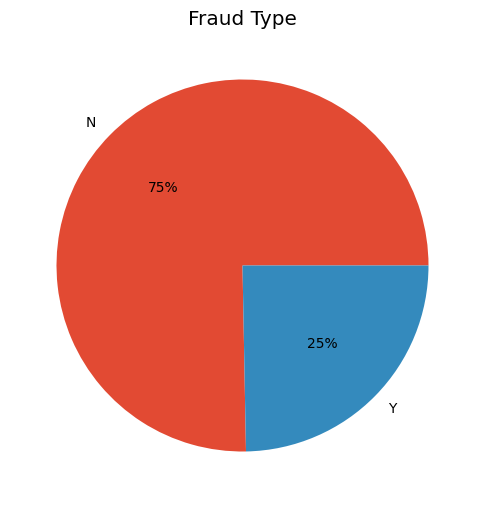

In [ ]:
plt.figure(figsize=(6,8))
plt.pie(df.fraud_reported.value_counts().values,labels=df.fraud_reported.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

Only 25% of the claims are detected as fraud and since this is the target feature, it shows that the dataset is imabalanced.

In [ ]:
df['incident_type'] = df['incident_type'].astype('category')
df['incident_severity'] = df['incident_severity'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_day,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,460,62,183430,2002-06-25,IN,250/500,1000,1187.96,4000000,618845,MALE,JD,other-service,bungie-jumping,own-child,0,0,2015-01-01,Thu,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,5380 Pine St,20,3,NO,1,0,NO,47160,0,5240,41920,Suburu,Impreza,2011,N
1,116,34,616337,2012-08-30,IN,250/500,500,1737.66,0,470577,MALE,Associate,transport-moving,chess,unmarried,0,-24100,2015-01-01,Thu,Single Vehicle Collision,Side Collision,Major Damage,Police,WV,Northbrook,5719 2nd Lane,1,1,NO,1,1,NO,97080,16180,16180,64720,BMW,X5,2001,Y
2,192,35,582011,1997-03-10,IL,100/300,1000,1245.89,0,435481,FEMALE,Masters,exec-managerial,movies,wife,0,-40300,2015-01-01,Thu,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Springfield,6011 Britain St,19,1,NO,0,0,NO,76600,15320,7660,53620,Mercedes,C300,2000,N
3,295,49,872814,1992-06-13,IL,100/300,500,1141.62,0,451672,MALE,College,prof-specialty,kayaking,husband,34300,-24300,2015-01-01,Thu,Vehicle Theft,Rear Collision,Minor Damage,None,WV,Columbus,8085 Andromedia St,4,1,YES,1,3,YES,4320,480,480,3360,Mercedes,E400,2002,N
4,200,40,932502,2010-05-11,IL,100/300,1000,1439.34,0,444822,FEMALE,High School,sales,exercise,other-relative,45300,-20400,2015-01-01,Thu,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,2577 Washington Drive,9,1,NO,0,0,NO,3690,410,410,2870,Ford,Escape,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,78,31,715202,1991-04-02,OH,250/500,1000,1377.23,0,440757,FEMALE,Masters,armed-forces,kayaking,unmarried,72600,0,2015-03-01,Sun,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NY,Hillsdale,9240 Britain Ave,1,3,NO,2,1,NO,52290,5810,11620,34860,Nissan,Maxima,1997,N
996,234,43,965187,1990-03-26,OH,250/500,500,1257.04,0,448294,MALE,Associate,protective-serv,reading,own-child,0,-48800,2015-03-01,Sun,Single Vehicle Collision,Rear Collision,Major Damage,Police,SC,Northbrook,7197 2nd Drive,4,1,NO,2,2,YES,51600,10320,5160,36120,Dodge,Neon,2011,N
997,312,47,646069,2002-06-08,OH,500/1000,1000,1212.07,0,459298,FEMALE,MD,exec-managerial,polo,wife,66900,-51800,2015-03-01,Sun,Multi-vehicle Collision,Side Collision,Total Loss,Fire,NY,Northbend,5318 5th Ave,17,3,NO,2,3,NO,56320,7040,7040,42240,Mercedes,ML350,2000,N
998,115,31,569714,2005-12-04,OH,500/1000,1000,1051.67,0,479824,FEMALE,Associate,exec-managerial,bungie-jumping,not-in-family,0,0,2015-03-01,Sun,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,WV,Riverwood,1472 4th Drive,18,3,YES,0,3,NO,34160,0,4270,29890,Audi,A5,2005,Y


In [ ]:
df['fraud_reported'] = df['fraud_reported'].astype(str)
df['fraud_reported'] = df['fraud_reported'].replace({'N': '0', 'Y': '1'})
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [ ]:
age_intervals = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
df['age_group'] = pd.cut(df['age'], bins=age_intervals)
print(df[['age', 'age_group']])

     age age_group
0     62  (60, 65]
1     34  (30, 35]
2     35  (30, 35]
3     49  (45, 50]
4     40  (35, 40]
..   ...       ...
995   31  (30, 35]
996   43  (40, 45]
997   47  (45, 50]
998   31  (30, 35]
999   36  (35, 40]

[1000 rows x 2 columns]


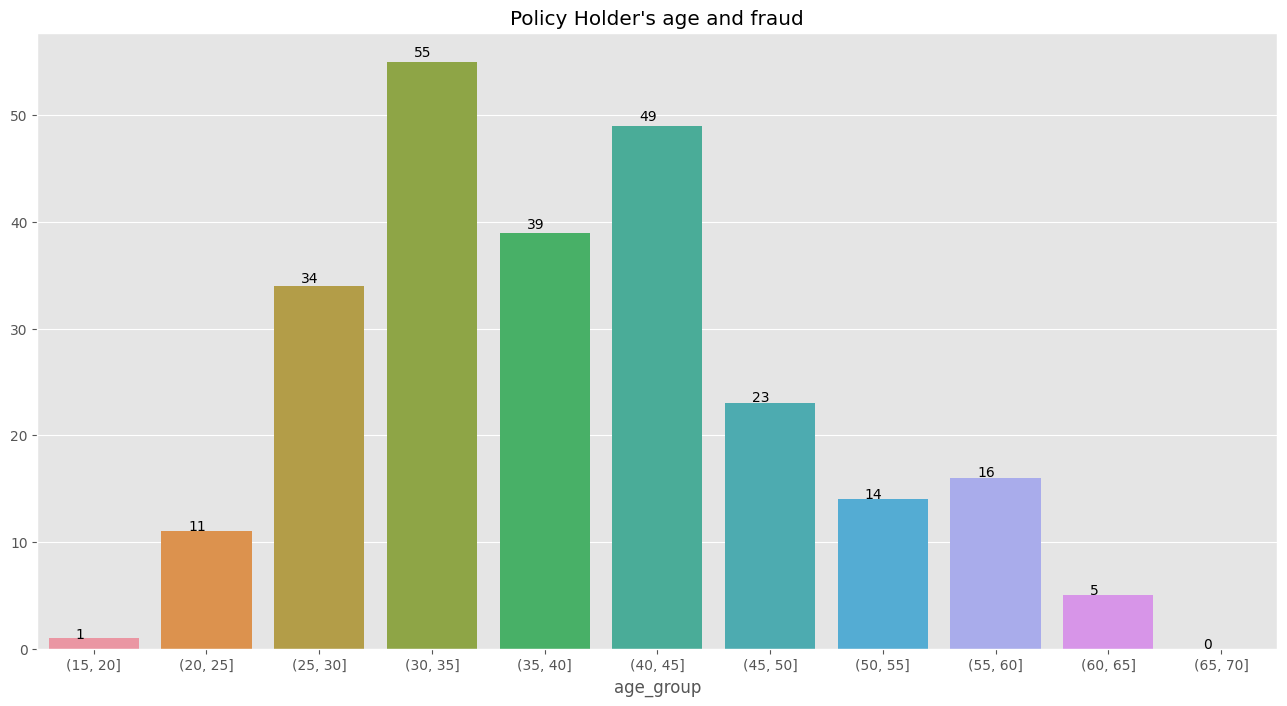

In [ ]:
fraud_count_by_age = df.groupby('age_group')['fraud_reported'].sum()

plt.figure(figsize=(16, 8))
plt.title("Policy Holder's age and fraud")

ax = sns.barplot(x=fraud_count_by_age.index, y=fraud_count_by_age.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x() + 0.24, p.get_height() * 1.01))

plt.show()


We see that age wise distribution with respect to Fraud reported shows a positively skewed graph with maximum frauds reported in the age interval 30-35.


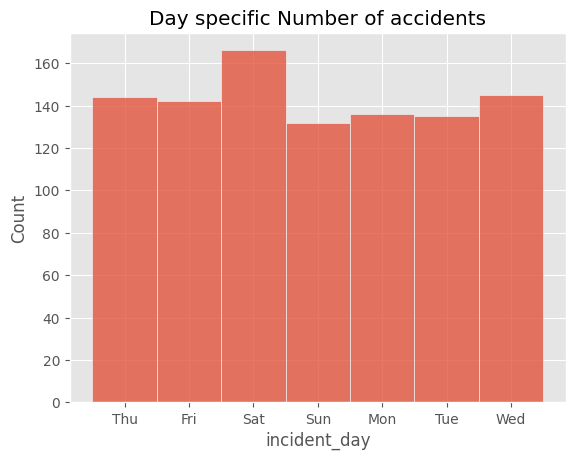

In [ ]:
sns.histplot(x='incident_day', data=df, bins=10, palette='Set3')
plt.title('Day specific Number of accidents')
plt.show()

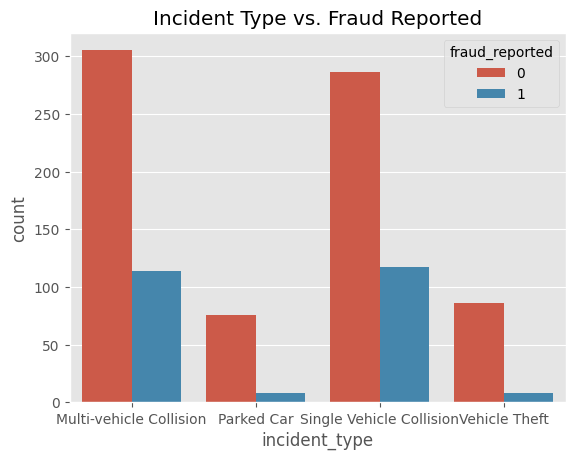

In [ ]:
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.title('Incident Type vs. Fraud Reported')
plt.show()

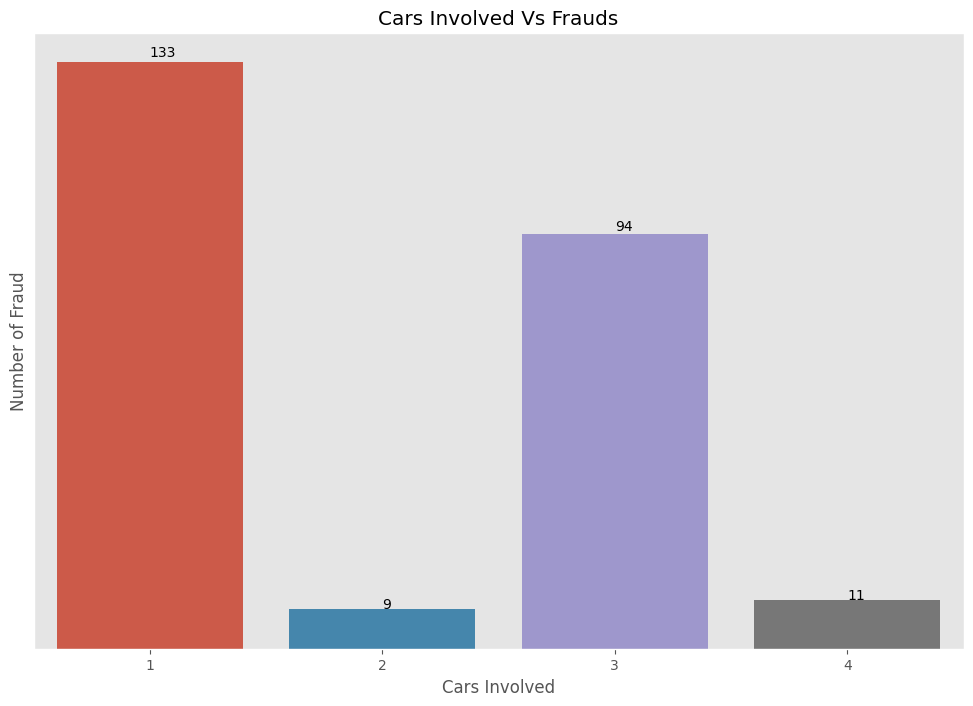

In [ ]:
cars = df.groupby('number_of_vehicles_involved')['fraud_reported'].sum()
plt.figure(figsize=(12,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

Maximum frauds occur when a single vehicle is involved


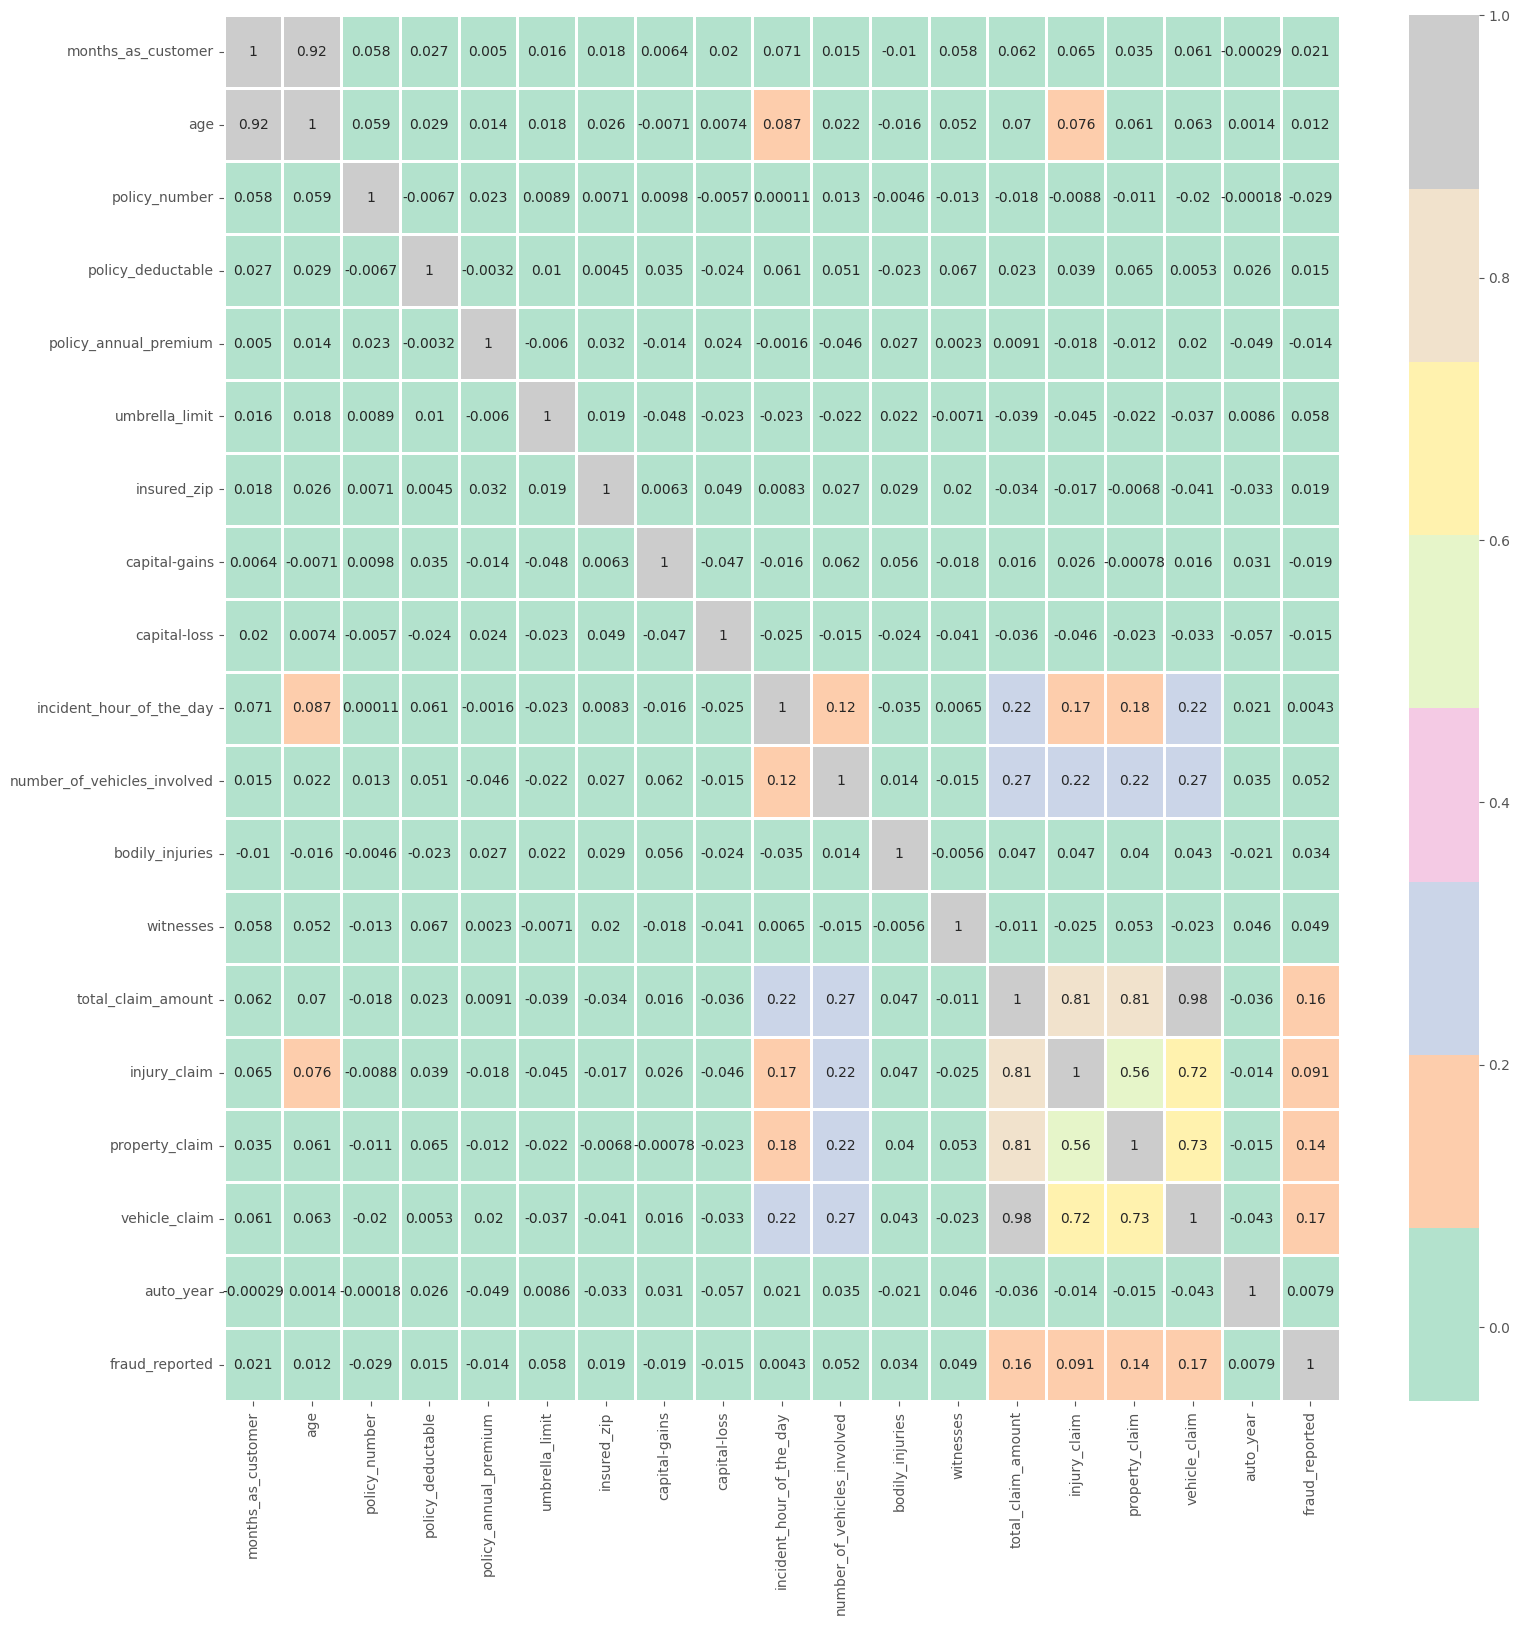

In [ ]:
plt.figure(figsize = (18, 18))

corr = df.corr()

sns.heatmap(data = corr, cmap="Pastel2", annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
to_drop =['age', 'policy_csl', 'total_claim_amount','incident_state','policy_number','policy_bind_date', 'policy_state','insured_zip','incident_location','incident_city','incident_date', 'incident_day', 'auto_make','auto_model','auto_year','insured_relationship', 'age_group']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (1000, 24)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,460,1000,1187.96,4000000,MALE,JD,other-service,bungie-jumping,0,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,20,3,NO,1,0,NO,0,5240,41920,0
1,116,500,1737.66,0,MALE,Associate,transport-moving,chess,0,-24100,Single Vehicle Collision,Side Collision,Major Damage,Police,1,1,NO,1,1,NO,16180,16180,64720,1
2,192,1000,1245.89,0,FEMALE,Masters,exec-managerial,movies,0,-40300,Single Vehicle Collision,Rear Collision,Total Loss,Other,19,1,NO,0,0,NO,15320,7660,53620,0
3,295,500,1141.62,0,MALE,College,prof-specialty,kayaking,34300,-24300,Vehicle Theft,Rear Collision,Minor Damage,None,4,1,YES,1,3,YES,480,480,3360,0
4,200,1000,1439.34,0,FEMALE,High School,sales,exercise,45300,-20400,Vehicle Theft,Rear Collision,Minor Damage,Police,9,1,NO,0,0,NO,410,410,2870,0


In [ ]:
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (1000, 24)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,460,1000,1187.96,4000000,MALE,JD,other-service,bungie-jumping,0,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,20,3,NO,1,0,NO,0,5240,41920,0
1,116,500,1737.66,0,MALE,Associate,transport-moving,chess,0,-24100,Single Vehicle Collision,Side Collision,Major Damage,Police,1,1,NO,1,1,NO,16180,16180,64720,1
2,192,1000,1245.89,0,FEMALE,Masters,exec-managerial,movies,0,-40300,Single Vehicle Collision,Rear Collision,Total Loss,Other,19,1,NO,0,0,NO,15320,7660,53620,0
3,295,500,1141.62,0,MALE,College,prof-specialty,kayaking,34300,-24300,Vehicle Theft,Rear Collision,Minor Damage,None,4,1,YES,1,3,YES,480,480,3360,0
4,200,1000,1439.34,0,FEMALE,High School,sales,exercise,45300,-20400,Vehicle Theft,Rear Collision,Minor Damage,Police,9,1,NO,0,0,NO,410,410,2870,0


In [ ]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [ ]:
y

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

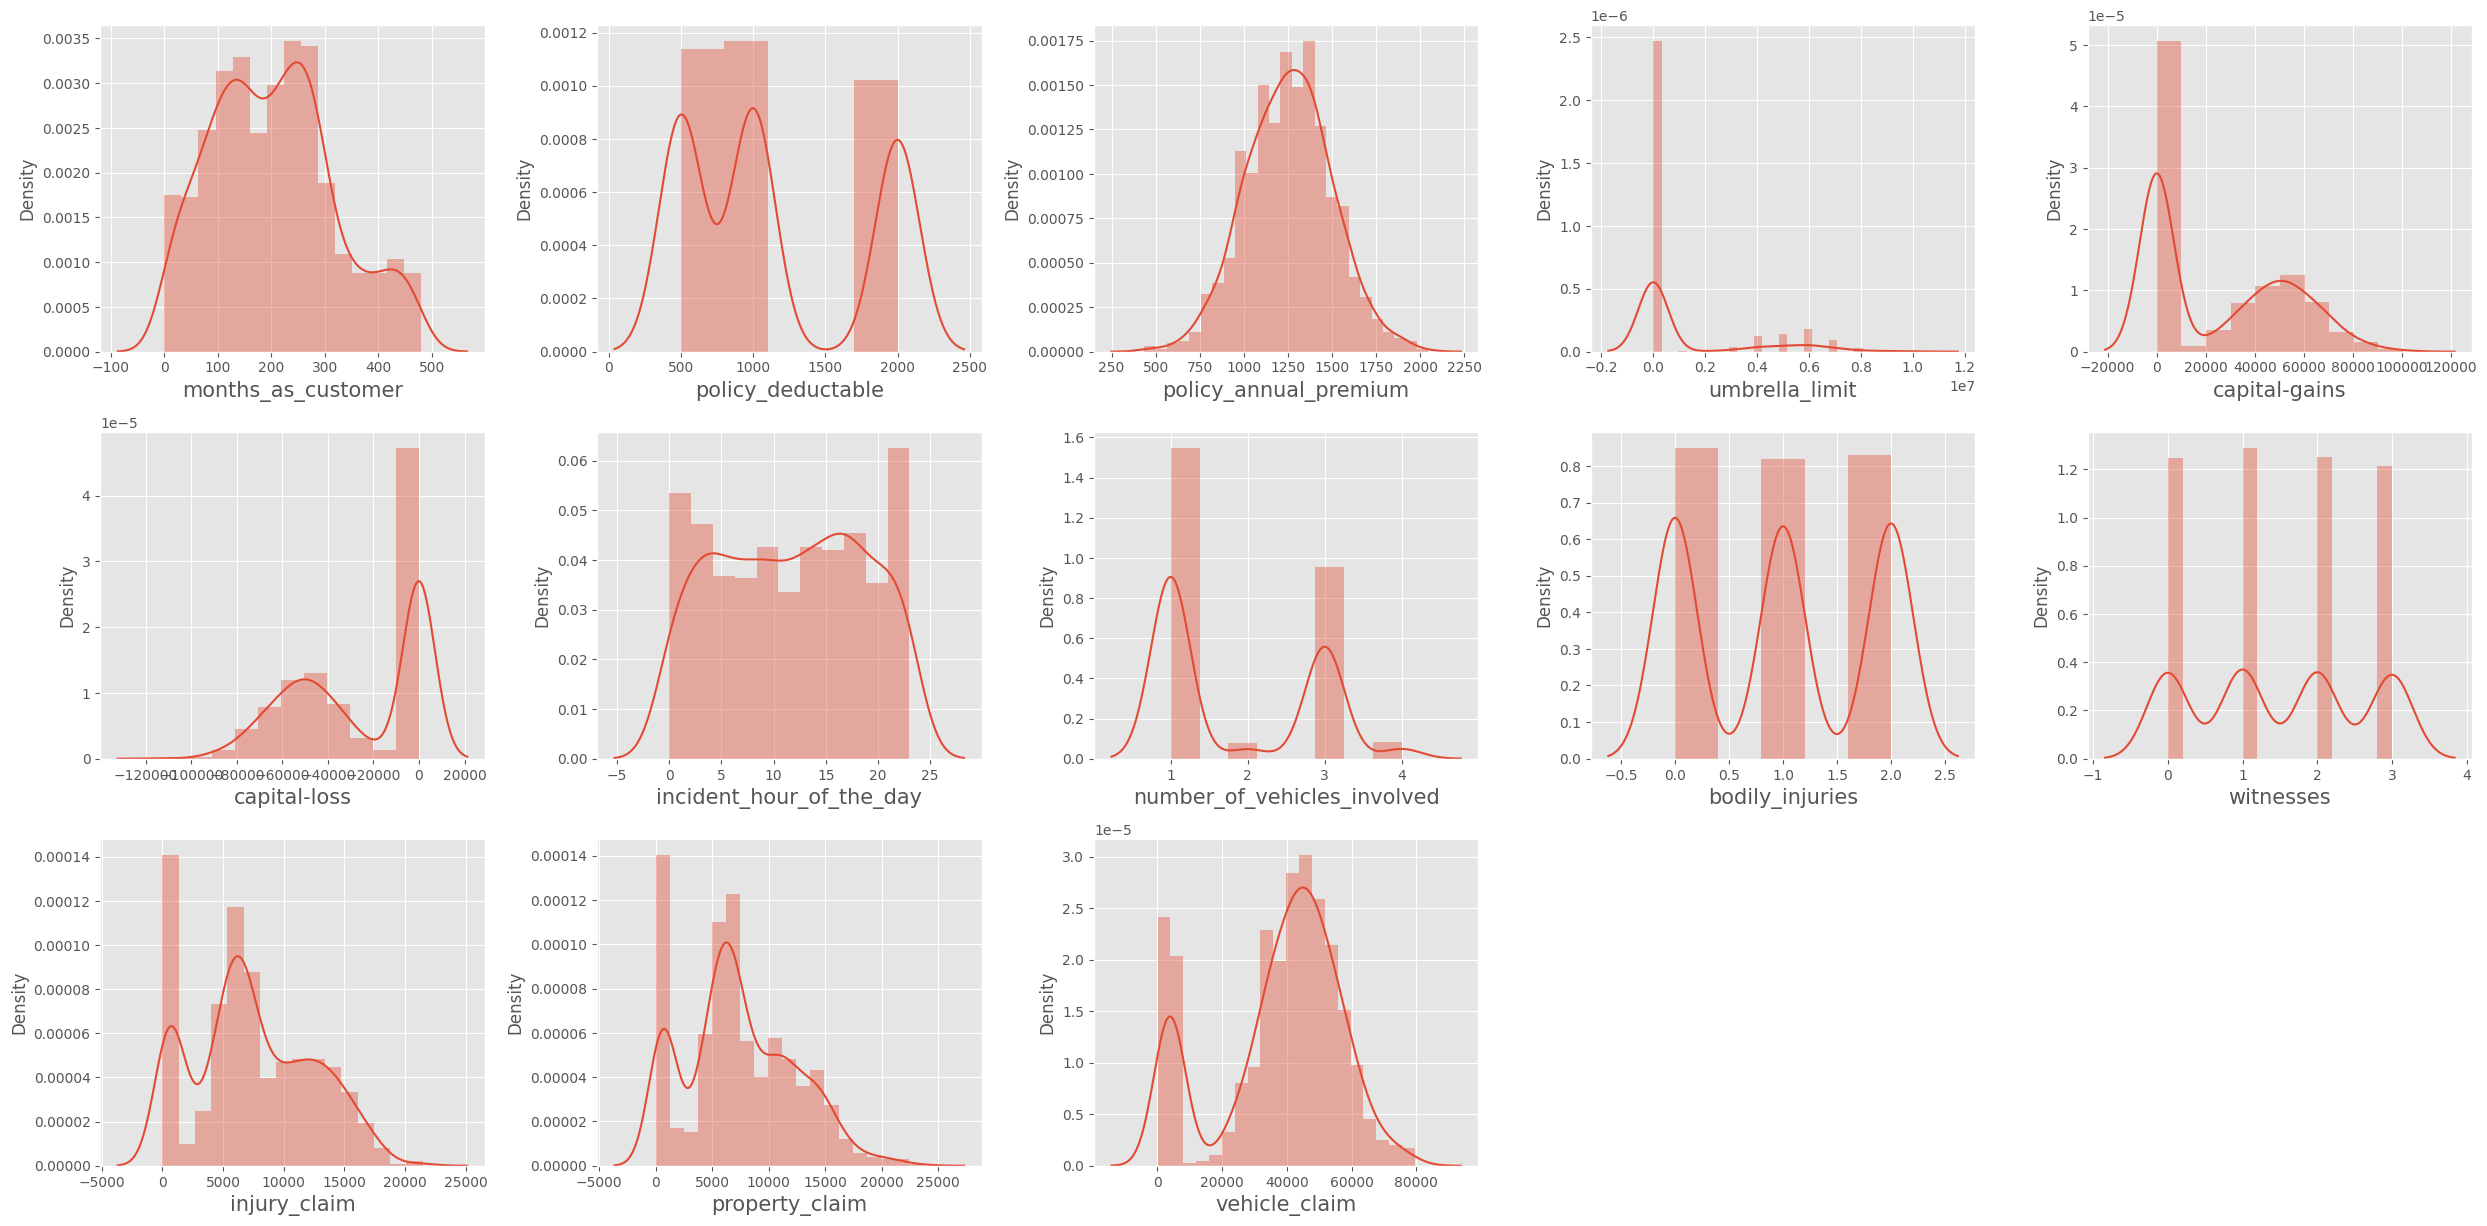

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()


    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])


    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)

    return df

In [ ]:
X = scale_and_encode(X)
X.tail()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
995,-1.094723,-0.222383,0.495088,-0.480548,1.704124,0.953851,-1.531974,1.140056,1.229693,-0.438431,-0.332770,0.875188,-0.162578,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
996,0.261143,-1.039966,0.002597,-0.480548,-0.901927,-0.783420,-1.100189,-0.823865,1.229693,0.461838,0.591693,-0.464418,-0.095829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
997,0.939076,-0.222383,-0.181672,-0.480548,1.499516,-0.890219,0.770881,1.140056,1.229693,1.362107,-0.080643,-0.074564,0.228378,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
998,-0.773139,-0.222383,-0.838927,-0.480548,-0.901927,0.953851,0.914809,1.140056,-1.210174,1.362107,-1.523707,-0.648977,-0.425864,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
999,-0.555853,1.412784,-1.135634,-0.480548,-0.901927,-1.431336,-1.388046,2.122017,-1.210174,0.461838,1.460811,1.484854,0.304662,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
def conf_matrix(y_test,y_pred):
  con_matrix = confusion_matrix(y_test, y_pred)
  con_matrix = pd.DataFrame(con_matrix, range(2), range(2))

  plt.figure(figsize=(5,5))
  plt.title("confusion matrix ")
  sns.heatmap(con_matrix, annot=True,cbar=False,fmt='g')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 66), (200, 66), (800,), (200,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

Accuracy of this model:		 0.845


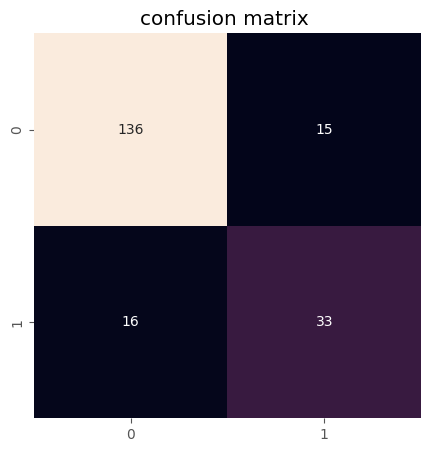

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test, lr_pred)
print("Accuracy of this model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

logreg_train_acc = accuracy_score(y_train, y_train_pred)
logreg_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Logistic Regression is: {logreg_train_acc}")
print(f"Test accuracy of Logistic Regression is: {logreg_test_acc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

acc_logreg = accuracy_score(y_test, y_test_pred)
print("Accuracy of this model:", acc_logreg)

Training accuracy of Logistic Regression is: 0.865
Test accuracy of Logistic Regression is: 0.845
Confusion Matrix:
[[136  15]
 [ 16  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       151
           1       0.69      0.67      0.68        49

    accuracy                           0.84       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.84      0.84      0.84       200

Accuracy of this model: 0.845


Accuracy of this model:		 0.8


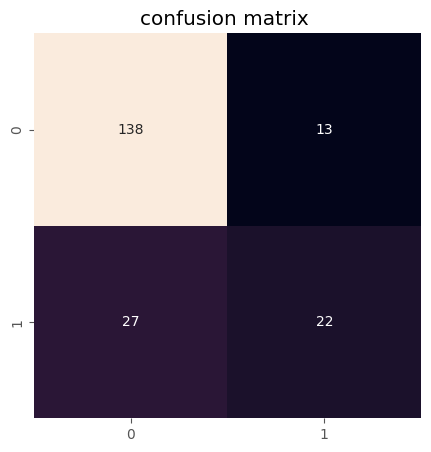

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of this model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of RFC is: {rfc_train_acc}")
print(f"Test accuracy of RFC is: {rfc_test_acc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc_rfc = accuracy_score(y_test, y_pred)
print("Accuracy of this model:", acc_rfc)

Training accuracy of RFC is: 1.0
Test accuracy of RFC is: 0.765
Confusion Matrix:
[[139  12]
 [ 35  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       151
           1       0.54      0.29      0.37        49

    accuracy                           0.77       200
   macro avg       0.67      0.60      0.61       200
weighted avg       0.74      0.77      0.74       200

Accuracy of this model: 0.765


**K Neighbors**


In [ ]:
error_rate = []

for i in range (1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

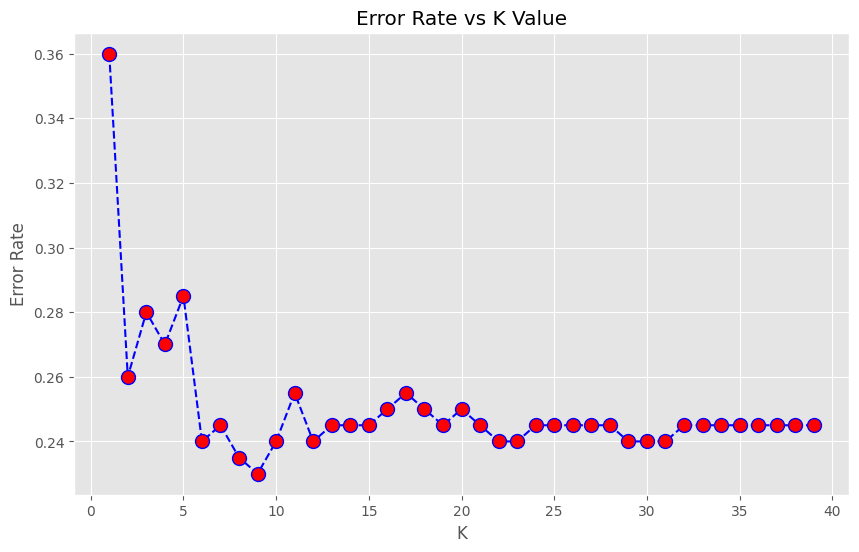

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor = 'red', markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')





In [ ]:
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7725
Test accuracy of KNN is : 0.77
[[149   2]
 [ 44   5]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       151
           1       0.71      0.10      0.18        49

    accuracy                           0.77       200
   macro avg       0.74      0.54      0.52       200
weighted avg       0.76      0.77      0.70       200



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [ ]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.74
[[120  31]
 [ 21  28]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       151
           1       0.47      0.57      0.52        49

    accuracy                           0.74       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.76      0.74      0.75       200



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # You can adjust the range
    'penalty': ['l1', 'l2']
}

In [ ]:
logistic_regression = LogisticRegression()
sm = SMOTE(random_state=42)
scoring = make_scorer(f1_score)

In [ ]:
grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid,
    scoring=scoring,
    cv=20,  # You can adjust the number of cross-validation folds
    n_jobs=-1
)

In [ ]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((1204, 66), (1204,))

In [ ]:
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Hyperparameters:", best_params)
print("Best F1-Score:", best_score)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best F1-Score: 0.878861309030764


In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((1204, 66), (1204,))

In [ ]:
logreg = LogisticRegression(C=1, penalty='l2', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

logreg_train_acc = accuracy_score(y_train_resampled, y_train_pred)
logreg_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Logistic Regression is: {logreg_train_acc}")
print(f"Test accuracy of Logistic Regression is: {logreg_test_acc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

acc_logreg = accuracy_score(y_test, y_test_pred)
print("Accuracy of this model:", acc_logreg)

Training accuracy of Logistic Regression is: 0.915282392026578
Test accuracy of Logistic Regression is: 0.855
Confusion Matrix:
[[134  17]
 [ 12  37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       151
           1       0.69      0.76      0.72        49

    accuracy                           0.85       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.86      0.85      0.86       200

Accuracy of this model: 0.855


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score)

In [ ]:
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,  # You can adjust the number of cross-validation folds
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1-Score:", best_score)

NameError: ignored

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

y_train_pred = rfc.predict(X_train_resampled)
y_test_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train_resampled, y_train_pred)
rfc_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Random Forest Classifier is: {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is: {rfc_test_acc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report:")
print(classification_report(y_test, y_test_pred))



Training accuracy of Random Forest Classifier is: 1.0
Test accuracy of Random Forest Classifier is: 0.78
Confusion Matrix:
[[134  17]
 [ 27  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.56      0.45      0.50        49

    accuracy                           0.78       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.77      0.78      0.77       200

Accuracy of this model: 0.78
